# 1. Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime,time
from wordcloud import WordCloud, STOPWORDS

# 2. Nhập dữ liệu từ file .csv và chuyển sang đúng định dạng

In [3]:
IMAGES_PATH = 'Images/'
pd.set_option('display.max_colwidth',None)
df = pd.read_csv('Data/unity3dCleaned.csv')

In [4]:
def DatetimeParse(inputStr : str = None) -> datetime:
    return datetime.strptime(inputStr,"%Y-%m-%d %H:%M:%S")
def DatetimeParseComment(inputStr : str = None) -> datetime:
    return datetime.strptime(inputStr, "%Y, %m, %d, %H, %M")
for i in range(len(df)):
    df['Time'].at[i] = DatetimeParse(df['Time'].iloc[i])
for i in range(len(df)):
    df['Comments'].at[i] = ast.literal_eval(df['Comments'].iloc[i])
    for j in range(len(df['Comments'].iloc[i])):
        df['Comments'].iloc[i][j]['Time'] = DatetimeParseComment(df['Comments'].iloc[i][j]['Time'])

In [ ]:
df.info()
df.describe()

# 3. Tiến hành trực quan hóa dữ liệu

Hàm hỗ trợ

In [ ]:
def GetDataFromBetweenTime(data : pd.DataFrame = None,fromTime : datetime = None,toTime : datetime = None) -> pd.DataFrame:
    return data[(data['Time']>=fromTime) & (df['Time'] <= toTime)]

Tính trục thời gian theo chiều ngang (Ox)

In [5]:
maxTime = 24*3600
def GetTimeValue(inputTime : time = None) -> int:
    return inputTime.hour * 3600 + inputTime.minute * 60 + inputTime.second
timeSeries = pd.Series()
for i in range(len(df)):
    timeSeries.at[i] = GetTimeValue(df['Time'].iloc[i].time())
minTime = df['Time'].min()
maxTime = df['Time'].max()
xtickArr = []
for i in range(minTime.month,maxTime.month+(maxTime.year-minTime.year)*12+2):
    yearAdd = i//12
    monthAdd = i%12
    if (monthAdd == 0):
        monthAdd = 12
        yearAdd -= 1
    tempDate = datetime(minTime.year+yearAdd,monthAdd,1)
    xtickArr.append(tempDate)
xtickArr.remove(xtickArr[0])
xtickArr[0] = minTime
xtickArr[len(xtickArr)-1] = maxTime

Heatmap của số lượt reaction từng loại

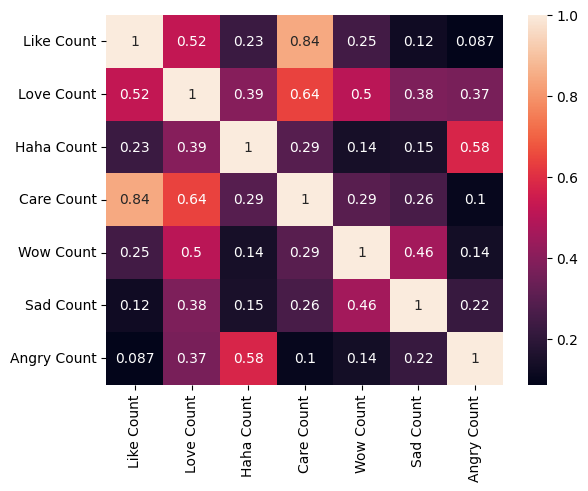

In [7]:
corrMatrix = df[['Like Count','Love Count','Haha Count','Care Count','Wow Count','Sad Count','Angry Count']].corr()
sns.heatmap(corrMatrix,annot=True)
plt.savefig(IMAGES_PATH + "Fig7_ReactionCountMap.png")

Heatmap của tỉ lệ reaction từng loại

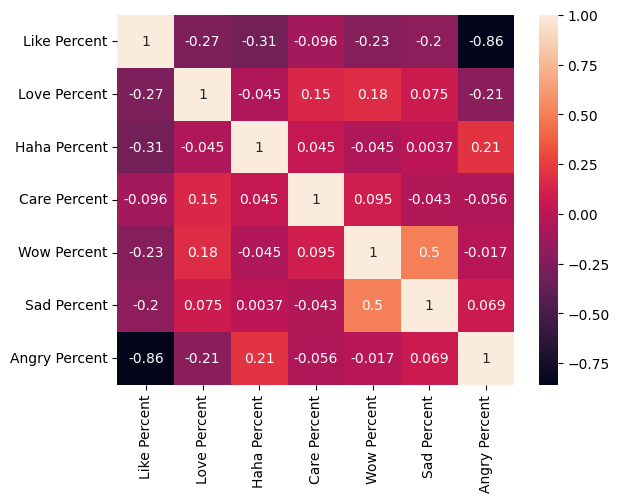

In [8]:
df['Like Percent'] = df['Like Count']/df['Reaction Count']*100
df['Love Percent'] = df['Love Count']/df['Reaction Count']*100
df['Haha Percent'] = df['Haha Count']/df['Reaction Count']*100
df['Care Percent'] = df['Care Count']/df['Reaction Count']*100
df['Wow Percent'] = df['Wow Count']/df['Reaction Count']*100
df['Sad Percent'] = df['Sad Count']/df['Reaction Count']*100
df['Angry Percent'] = df['Angry Count']/df['Reaction Count']*100
corrMatrix = df[['Like Percent','Love Percent','Haha Percent','Care Percent','Wow Percent','Sad Percent','Angry Percent']].corr()
sns.heatmap(corrMatrix,annot=True)
plt.savefig(IMAGES_PATH + "Fig8_ReactionPercentMap.png")

Số lượt reaction từng loại theo thời gian

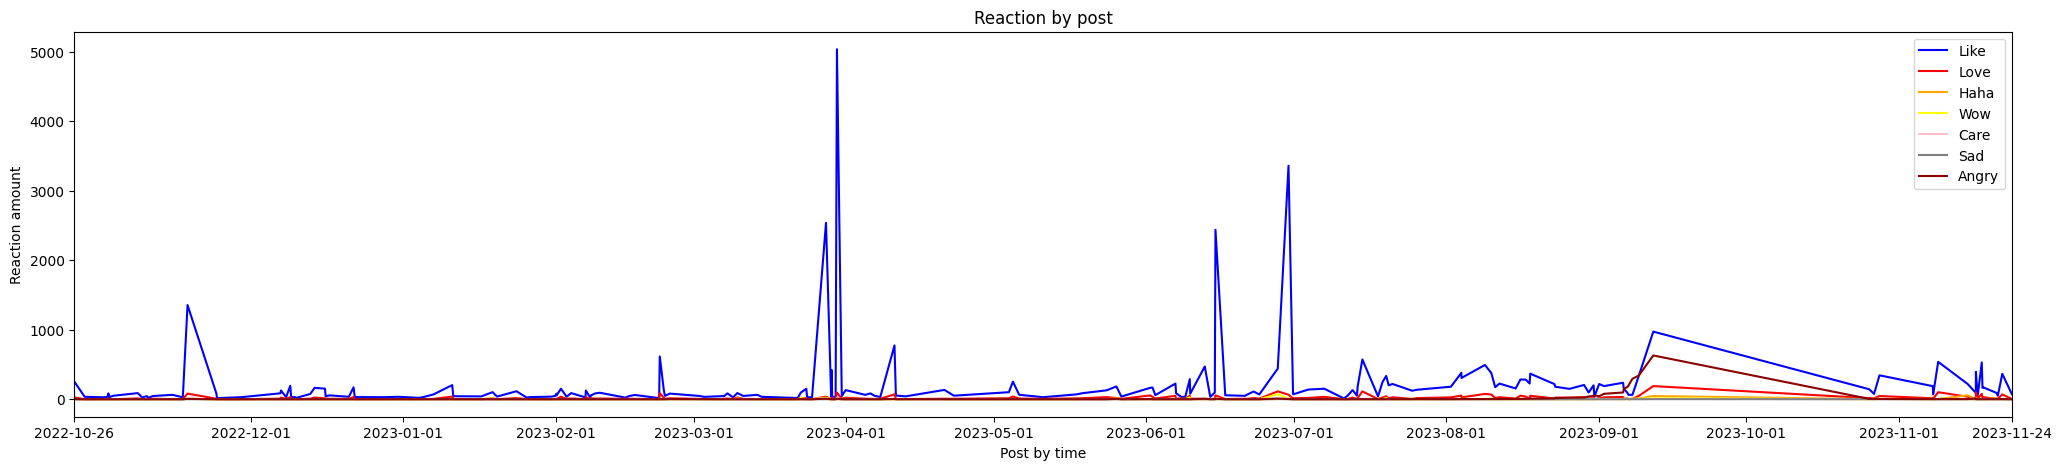

In [9]:
x_label = df['Time']
plt.figure(figsize=(25,5))
sns.lineplot(x=x_label,label='Like',y=df['Like Count'],color='blue')
sns.lineplot(x=x_label,label='Love',y=df['Love Count'],color='red')
sns.lineplot(x=x_label,label='Haha',y=df['Haha Count'],color='orange')
sns.lineplot(x=x_label,label='Wow',y=df['Wow Count'],color='yellow')
sns.lineplot(x=x_label,label='Care',y=df['Care Count'],color='pink')
sns.lineplot(x=x_label,label='Sad',y=df['Sad Count'],color='grey')
sns.lineplot(x=x_label,label='Angry',y=df['Angry Count'],color='darkred')
plt.xlabel('Post by time')
plt.ylabel('Reaction amount')
plt.title('Reaction by post')
plt.xlim(minTime,maxTime)
plt.xticks(xtickArr)
plt.legend()
plt.savefig(IMAGES_PATH + "Fig9_ReactionCount.png")
plt.show()

Tỉ lệ reaction từng loại theo thời gian

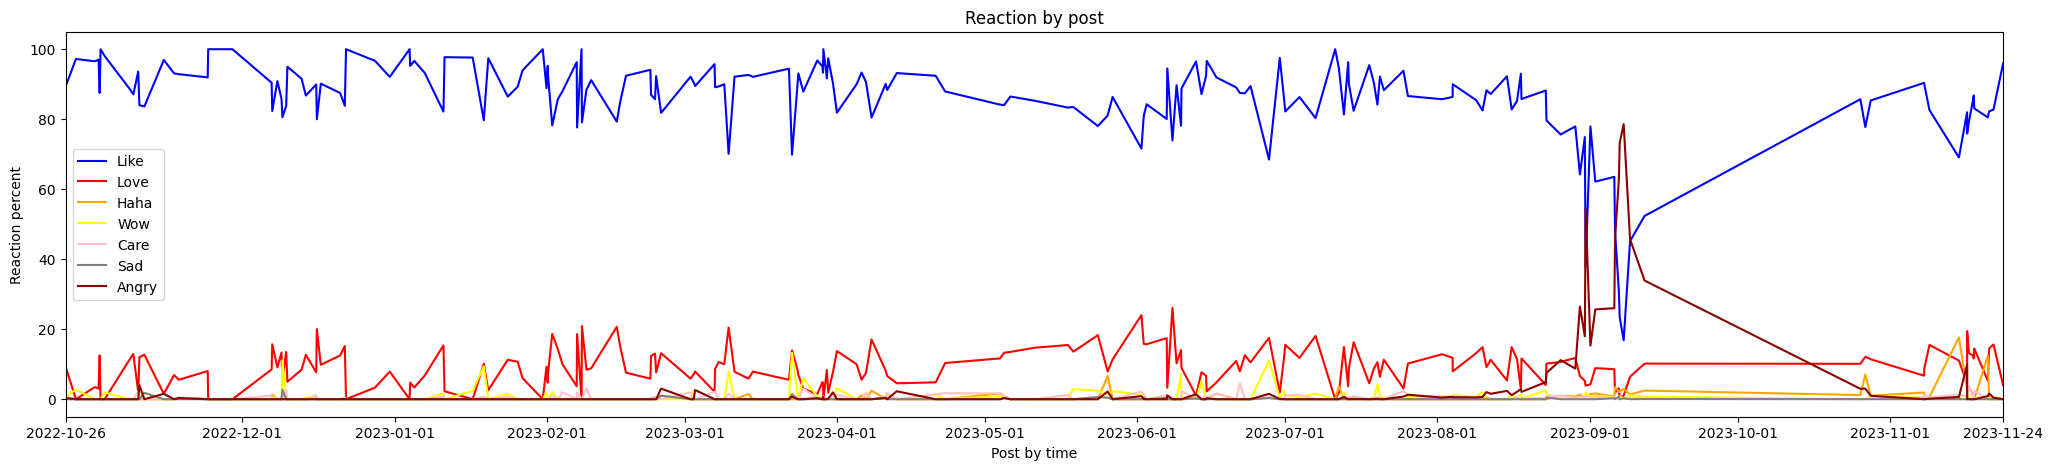

In [10]:
x_label = df['Time']
plt.figure(figsize=(25,5))
sns.lineplot(x=x_label,label='Like',y=df['Like Percent'],color='blue')
sns.lineplot(x=x_label,label='Love',y=df['Love Percent'],color='red')
sns.lineplot(x=x_label,label='Haha',y=df['Haha Percent'],color='orange')
sns.lineplot(x=x_label,label='Wow',y=df['Wow Percent'],color='yellow')
sns.lineplot(x=x_label,label='Care',y=df['Care Percent'],color='pink')
sns.lineplot(x=x_label,label='Sad',y=df['Sad Percent'],color='grey')
sns.lineplot(x=x_label,label='Angry',y=df['Angry Percent'],color='darkred')
plt.xlabel('Post by time')
plt.ylabel('Reaction percent')
plt.title('Reaction by post')
plt.xlim(minTime,maxTime)
plt.xticks(xtickArr)
plt.legend()
plt.savefig(IMAGES_PATH + "Fig10_ReactionPercent.png")
plt.show()

Tỉ lệ reaction thích và phẫn nộ trong khoảng 25-9-2023 và 15-10-2023

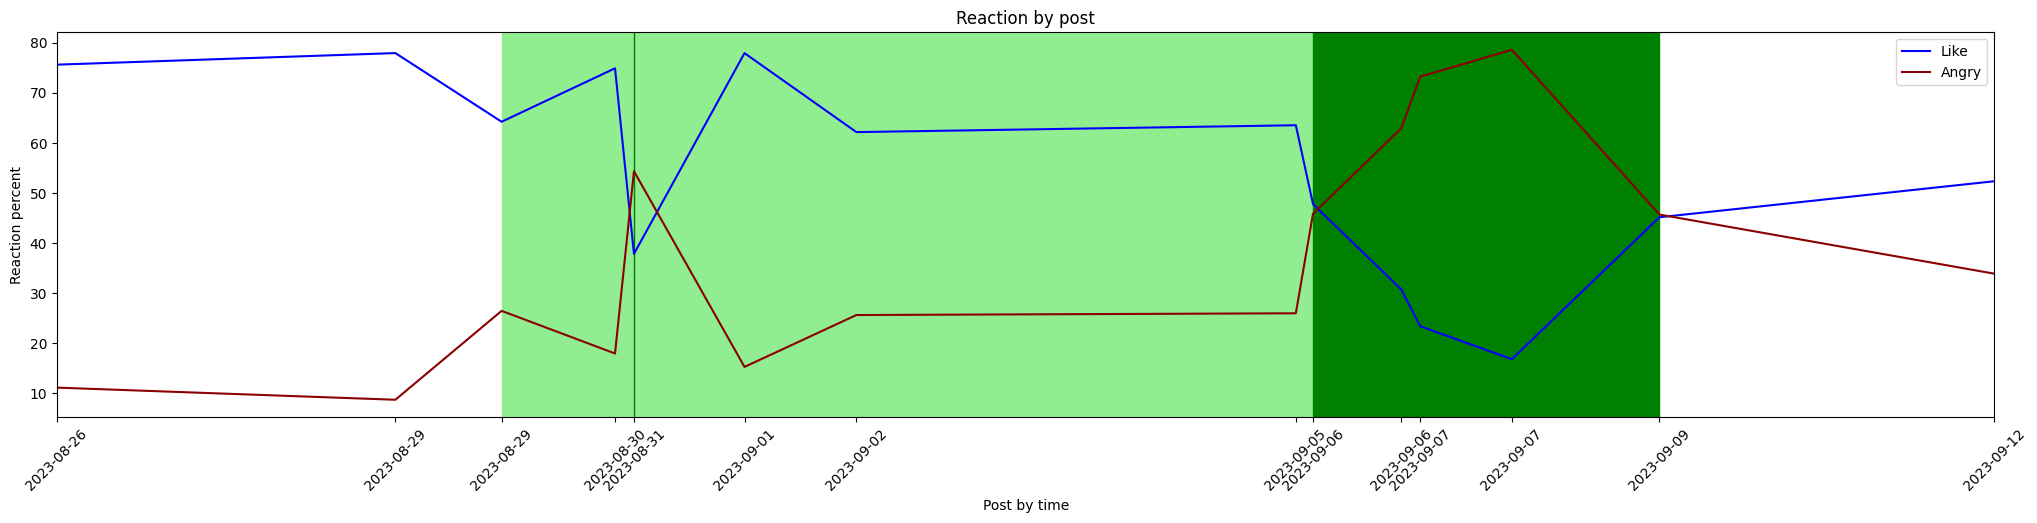

In [11]:
tdf = GetDataFromBetweenTime(df,datetime(2023,8,25),datetime(2023,10,15))
x_label = tdf['Time']
plt.figure(figsize=(25,5))
sns.lineplot(x=x_label,label='Like',y=tdf['Like Percent'],color='blue')
sns.lineplot(x=x_label,label='Angry',y=tdf['Angry Percent'],color='darkred')
plt.xlabel('Post by time')
plt.ylabel('Reaction percent')
plt.title('Reaction by post')
plt.xlim(tdf['Time'].min(),tdf['Time'].max())
plt.xticks(x_label,rotation = 45)
plt.legend()
plt.axvspan(xmin=tdf['Time'].iloc[5],xmax=tdf['Time'].iloc[11],color='lightgreen')
plt.axvspan(xmin=tdf['Time'].iloc[1],xmax=tdf['Time'].iloc[5],color='green')
plt.axvspan(xmin=tdf['Time'].iloc[9],xmax=tdf['Time'].iloc[9],color='green')
plt.savefig(IMAGES_PATH + "Fig11_ReactionPercentSpecial.png")
plt.show()

Nội dung bình luận trong toàn thời gian

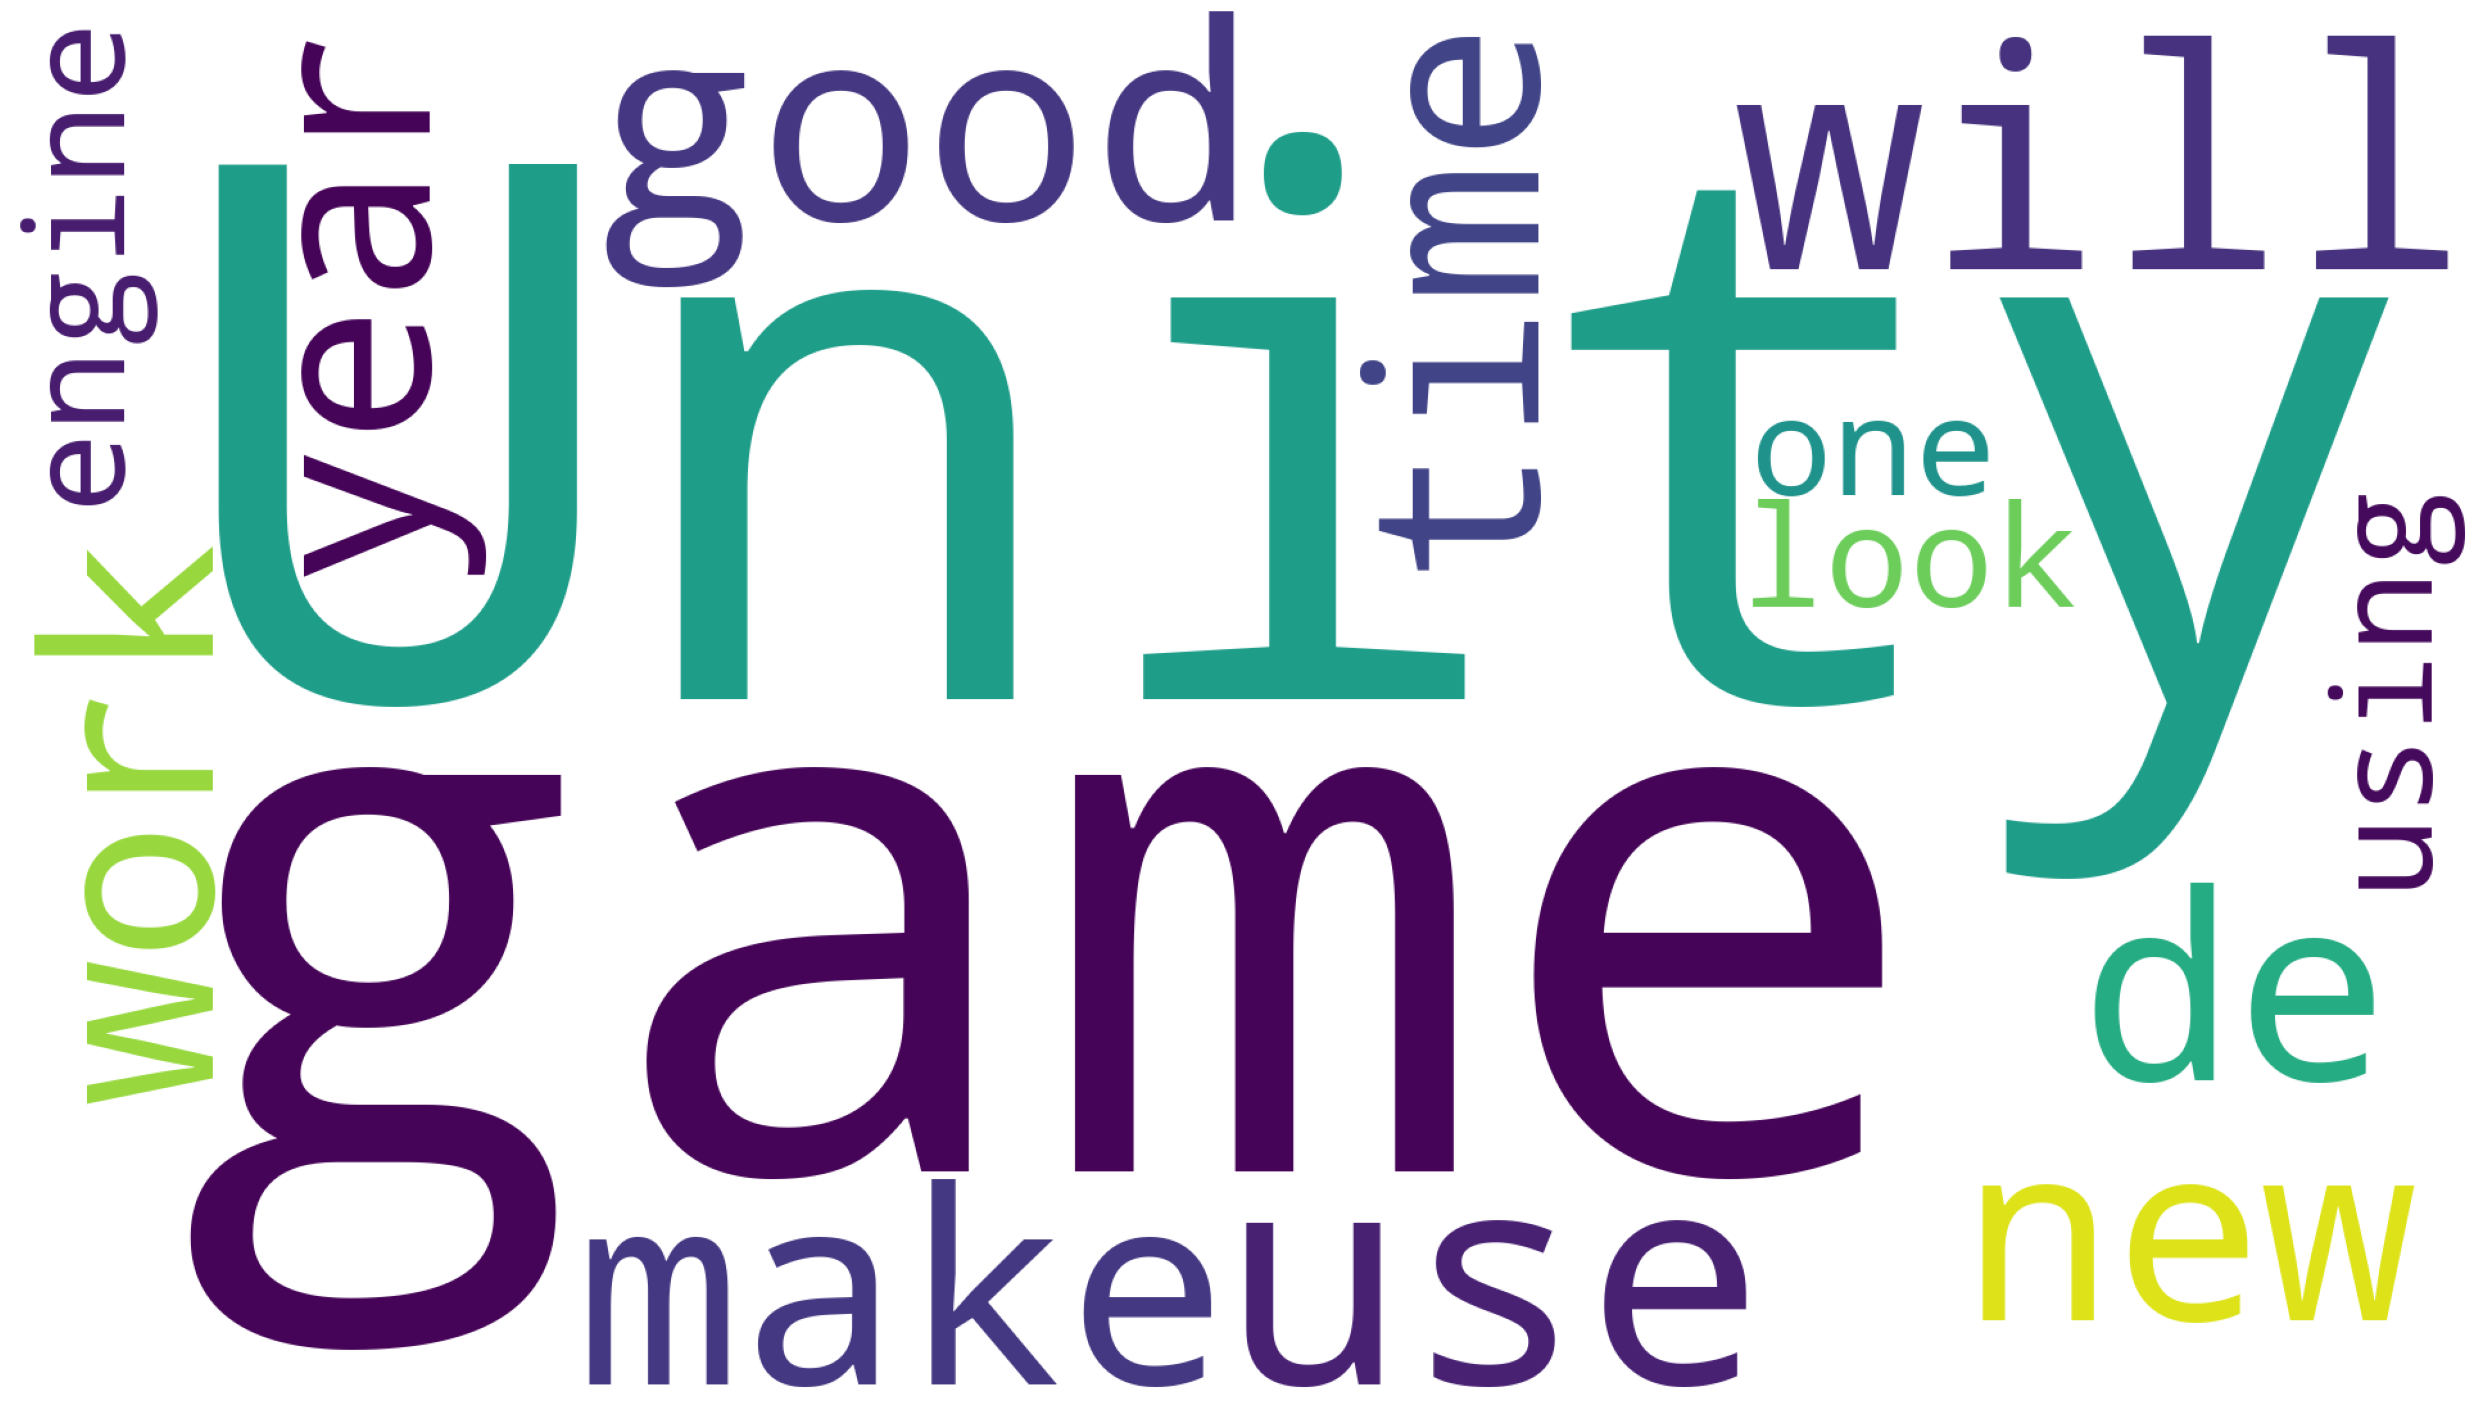

In [15]:
fullCommentText = ''
tdf = df
for ele in tdf['Comments']:
    for index in range(len(ele)):
        fullCommentText += ele[index]['Text']
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', max_words=15,width=1920, height=1080).generate(fullCommentText)
plt.figure(figsize=(32,18))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig(IMAGES_PATH + 'Fig12_CommentWordCloudSpecial1.png')
plt.show()

Nội dung bình luận trong khoảng 22-8-2023 và 1-10-2023

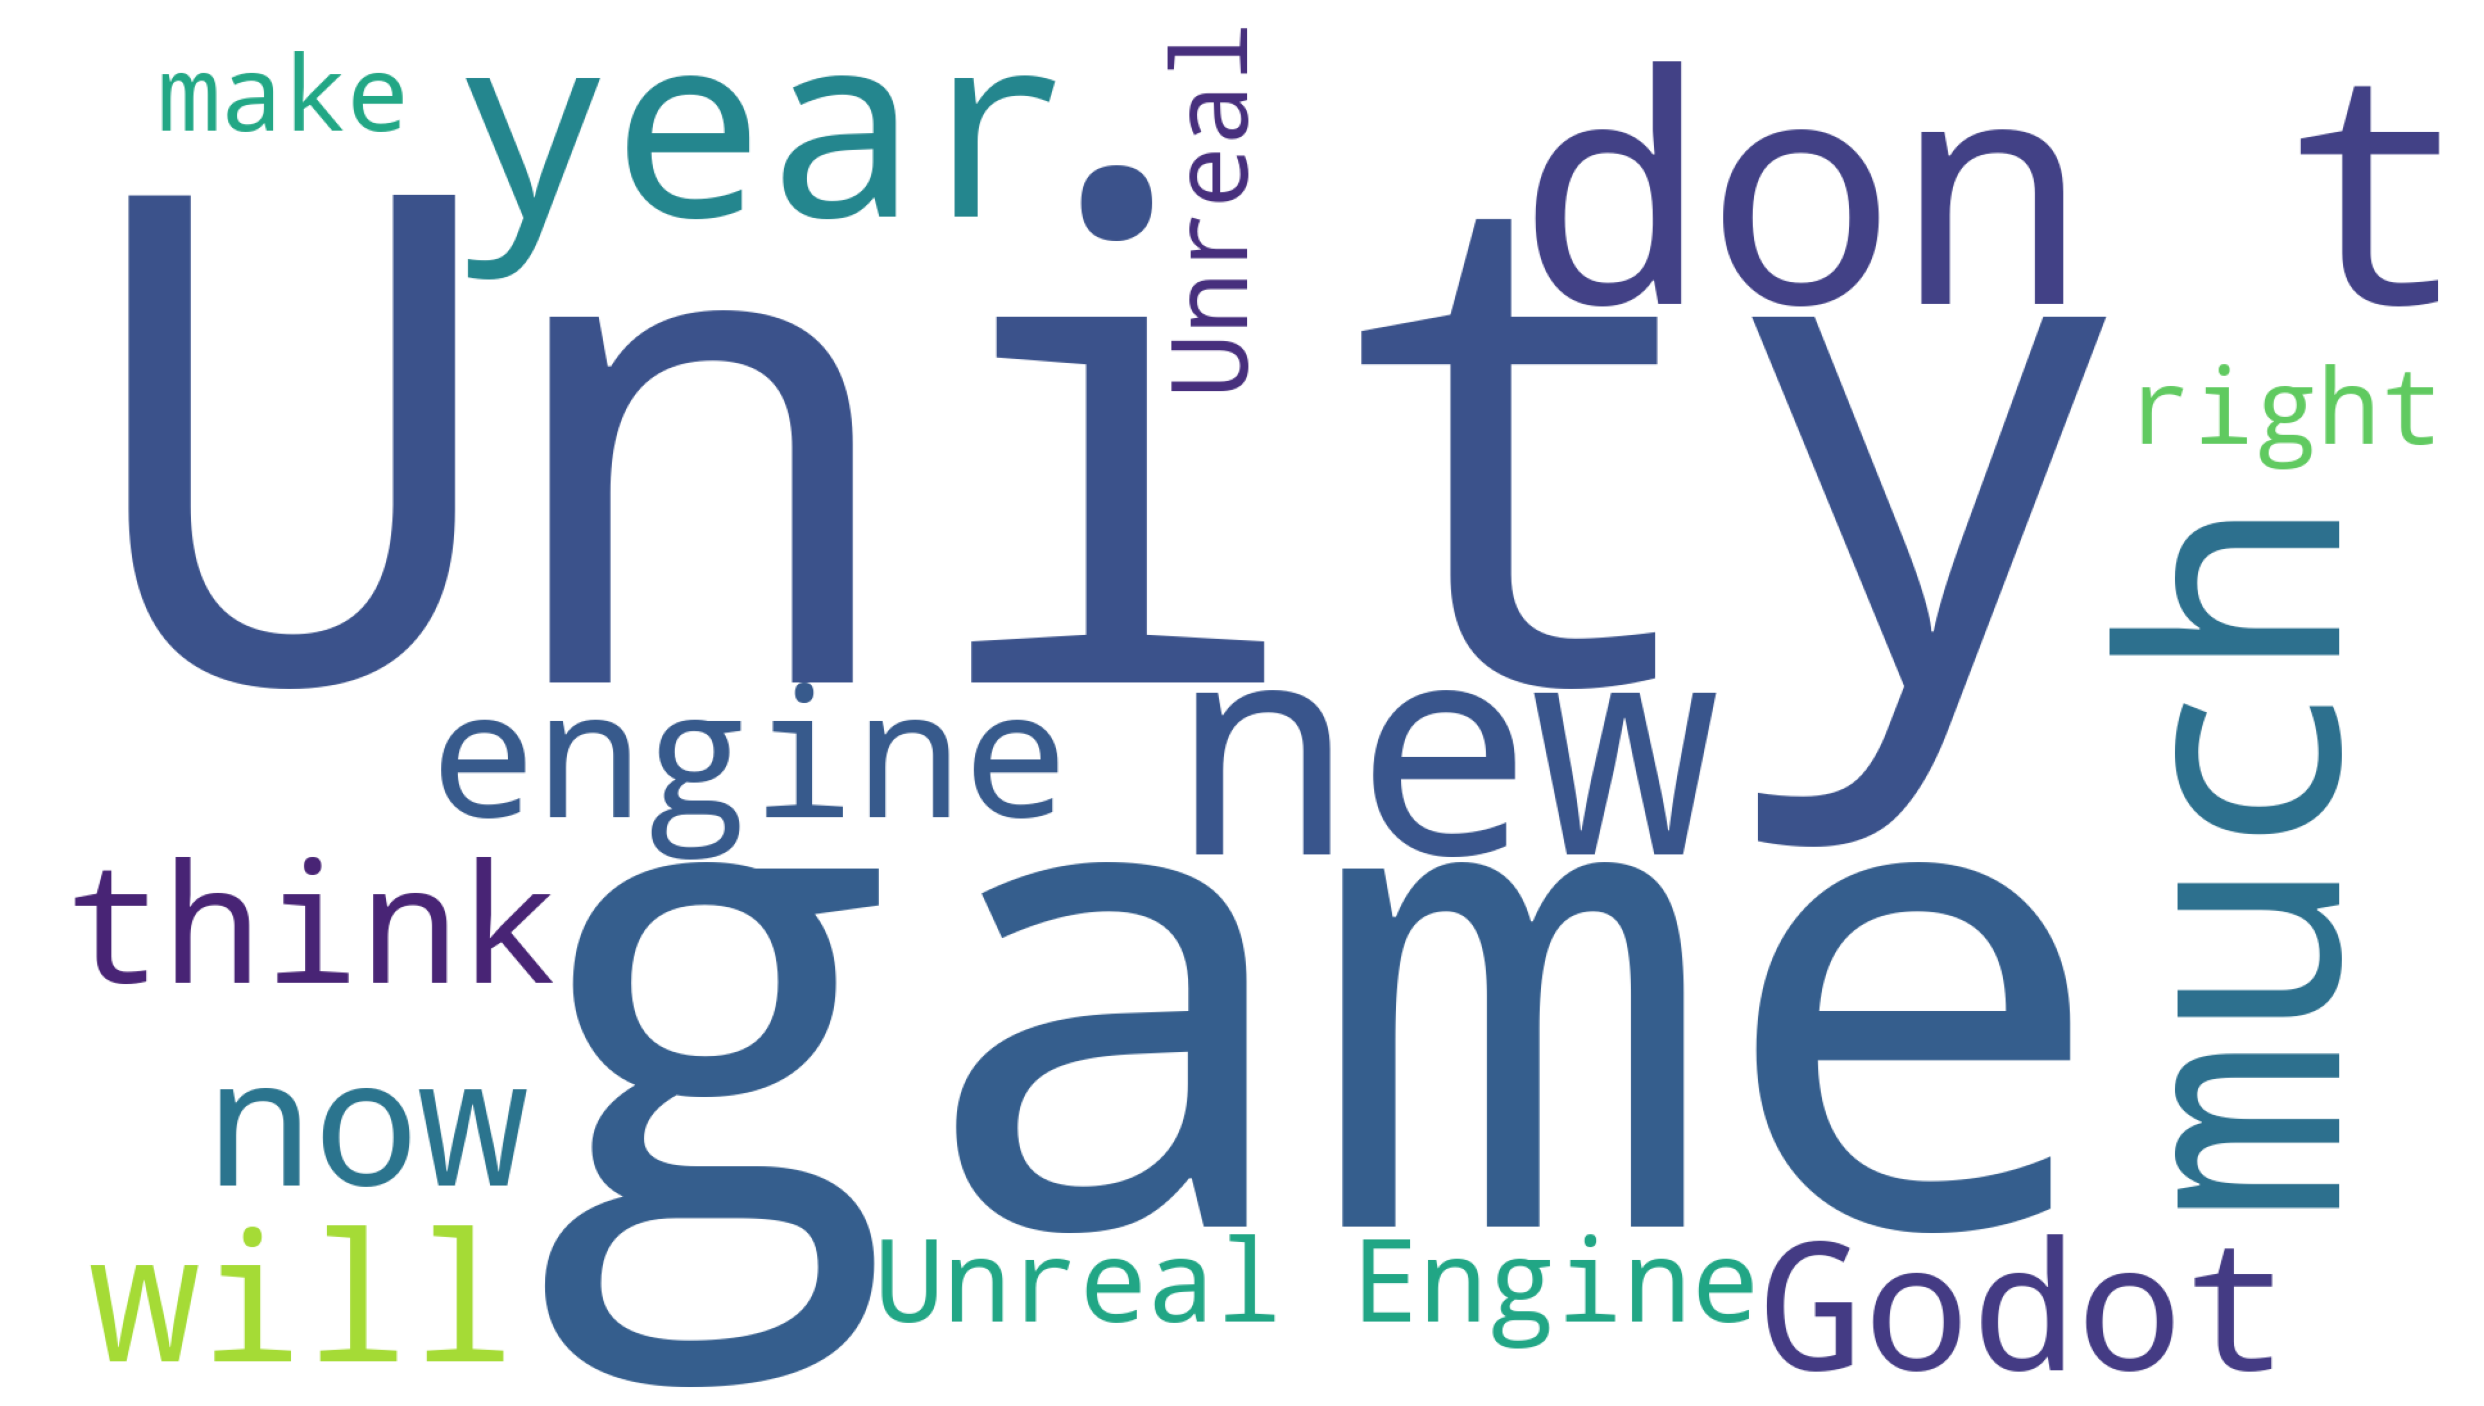

In [19]:
tdf = GetDataFromBetweenTime(df,datetime(2023,8,22),datetime(2023,10,1))
fullCommentText = ''
for ele in tdf['Comments']:
    for index in range(len(ele)):
        fullCommentText += ele[index]['Text']
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', max_words=15,width=1920, height=1080).generate(fullCommentText)
plt.figure(figsize=(32,18))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig(IMAGES_PATH + 'Fig12_CommentWordCloudSpecial2.png')
plt.show()